In [1]:
from glob import glob

%matplotlib inline
import os
from pathlib import Path
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
!rm utils.py;wget https://raw.githubusercontent.com/sevenfx/fastai_audio/master/notebooks/utils.py
from utils import read_file, transform_path
from tqdm import tqdm

from IPython.display import clear_output

!pip install wavio soundfile
import wave
import librosa
import soundfile as sf

--2020-12-10 18:16:11--  https://raw.githubusercontent.com/sevenfx/fastai_audio/master/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7182 (7.0K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   7.01K  --.-KB/s    in 0s      

2020-12-10 18:16:11 (78.4 MB/s) - ‘utils.py’ saved [7182/7182]



In [2]:
!rm -rf covid;git clone https://github.com/virufy/covid.git

AUDIO_DIR = Path('covid/data/clinical/segmented')
IMG_DIR = Path('imgs')
!mkdir {IMG_DIR} -p
!mv covid/data/clinical/segmented/neg/* covid/data/clinical/segmented/
!mv covid/data/clinical/segmented/pos/* covid/data/clinical/segmented/
!rm -rf covid/data/clinical/segmented/neg/ covid/data/clinical/segmented/pos/

for ind, f in enumerate(tqdm(glob(str(AUDIO_DIR)+'/*'))):
  !ffmpeg -i {f} {'/'.join(f.split('/')[:4])+'/'+f.split('/')[-1].split('-')[0]+'_'+str(ind)+'.wav'} &>/dev/null
!rm covid/data/clinical/segmented/*.mp3

Cloning into 'covid'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 227 (delta 123), reused 203 (delta 108), pack-reused 0
Receiving objects: 100% (227/227), 2.93 MiB | 8.97 MiB/s, done.
Resolving deltas: 100% (123/123), done.


100%|██████████| 121/121 [00:14<00:00,  8.27it/s]


In [3]:
fnames = os.listdir(str(AUDIO_DIR))
len(fnames), fnames[:5]

fn = fnames[0]

In [4]:
x, sr = read_file(fn, AUDIO_DIR)
x.shape, sr, x.dtype

((76795,), 48000, dtype('float32'))

In [5]:
def log_mel_spec_tfm(fname, src_path, dst_path):
    x, sample_rate = read_file(fname, src_path)
    
    n_fft = 1024
    hop_length = 256
    n_mels = 40
    fmin = 20
    fmax = sample_rate / 2 
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                    hop_length=hop_length, 
                                                    n_mels=n_mels, power=2.0, 
                                                    fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    dst_fname = dst_path / (fname[:-4] + '.png')
    print(dst_fname)
    plt.imsave(dst_fname, mel_spec_db)

imgs/neg_69.png


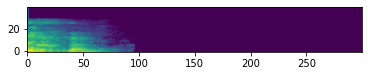

In [6]:
log_mel_spec_tfm(fn, AUDIO_DIR, IMG_DIR)
img = plt.imread(str(IMG_DIR)+'/'+fn[:-4]+'.png')
plt.imshow(img, origin='lower');

In [7]:
!rm -rf covid/data/clinical/segmented/.ipynb_checkpoints
transform_path(AUDIO_DIR, IMG_DIR, log_mel_spec_tfm, fnames=fnames, delete=True)

imgs/neg_69.png
imgs/pos_5.png
imgs/pos_67.png
imgs/pos_43.png
imgs/neg_34.png
imgs/neg_54.png
imgs/neg_116.png
imgs/pos_42.png
imgs/neg_68.png
imgs/neg_89.png
imgs/neg_17.png
imgs/pos_109.png
imgs/neg_114.png
imgs/pos_41.png
imgs/pos_61.png
imgs/neg_11.png
imgs/pos_103.png
imgs/neg_7.png
imgs/neg_77.png
imgs/neg_15.png
imgs/neg_52.png
imgs/neg_13.png
imgs/pos_93.png
imgs/pos_90.png
imgs/pos_58.png
imgs/neg_118.png
imgs/pos_39.png
imgs/neg_108.png
imgs/neg_64.png
imgs/pos_19.png
imgs/neg_102.png
imgs/pos_33.png
imgs/neg_97.png
imgs/pos_31.png
imgs/neg_81.png
imgs/pos_60.png
imgs/neg_38.png
imgs/neg_6.png
imgs/neg_21.png
imgs/neg_51.png
imgs/pos_55.png
imgs/neg_72.png
imgs/neg_87.png
imgs/neg_59.png
imgs/neg_49.png
imgs/pos_10.png
imgs/neg_94.png
imgs/neg_117.png
imgs/pos_56.png
imgs/pos_50.png
imgs/pos_63.png
imgs/neg_113.png
imgs/neg_88.png
imgs/neg_115.png
imgs/pos_20.png
imgs/pos_1.png
imgs/neg_71.png
imgs/pos_79.png
imgs/pos_83.png
imgs/neg_91.png
imgs/pos_70.png
imgs/pos_25.png
im

In [8]:
os.listdir(str(IMG_DIR))[:10]

['neg_87.png',
 'neg_29.png',
 'neg_76.png',
 'neg_49.png',
 'neg_112.png',
 'pos_103.png',
 'neg_104.png',
 'neg_113.png',
 'pos_48.png',
 'neg_15.png']

In [9]:
import fastai
fastai.__version__
from fastai.vision import *

In [10]:
digit_pattern = r'(pos|neg)_\d{1,}\.png$'

In [11]:
data = (ImageList.from_folder(IMG_DIR)
        .split_by_rand_pct(.2)
        .label_from_re(digit_pattern)
        .transform(size=(128,64))
        .databunch())
data.c, data.classes

(2, ['neg', 'pos'])

In [12]:
xs, ys = data.one_batch()
xs.shape, ys.shape

(torch.Size([64, 3, 128, 64]), torch.Size([64]))

In [13]:
xs.min(), xs.max(), xs.mean(), xs.std()

(tensor(0.0039), tensor(0.9897), tensor(0.2664), tensor(0.1898))

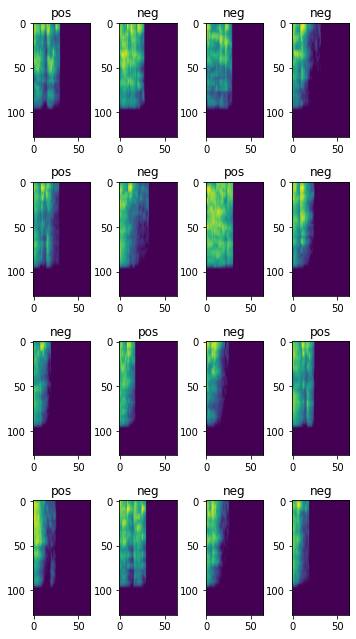

In [14]:
data.show_batch(4, figsize=(5,9), hide_axis=False)

In [15]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.567752,0.469179,0.833333,00:03
1,1.421041,0.439074,0.833333,00:03
2,1.187740,0.437785,0.833333,00:03
3,1.056429,0.452592,0.833333,00:03
4,0.912329,0.448632,0.791667,00:03
5,0.829109,0.453258,0.791667,00:03
6,0.726419,0.456925,0.791667,00:03
7,0.635895,0.439834,0.791667,00:03
8,0.565158,0.420308,0.791667,00:02
9,0.511822,0.426832,0.791667,00:03


In [16]:
learn.unfreeze()
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.106436,0.432967,0.791667,00:04
1,0.100258,0.463385,0.791667,00:04
2,0.092212,0.520732,0.750000,00:04
3,0.105146,0.421769,0.833333,00:04
4,0.111555,0.456457,0.833333,00:04
5,0.109557,0.507358,0.875000,00:04
6,0.098038,0.538981,0.833333,00:04
7,0.088794,0.546506,0.833333,00:04
8,0.082458,0.551256,0.791667,00:04
9,0.076674,0.507672,0.833333,00:04


In [ ]:
learn.export('learner.pkl')